# LSTM과 GRU 셀

In [1]:
from keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input,train_target),(test_input,test_target)=imdb.load_data(num_words=500)
train_input,val_input,train_target,val_target=train_test_split(train_input,train_target,test_size=0.2,random_state=42)

In [2]:
from keras.preprocessing.sequence import pad_sequences
train_seq=pad_sequences(train_input,maxlen=100)
val_seq=pad_sequences(val_input,maxlen=100)

In [3]:
import keras

model_lstm=keras.Sequential()
model_lstm.add(keras.layers.Input(shape=(100,)))
model_lstm.add(keras.layers.Embedding(500,16))
model_lstm.add(keras.layers.LSTM(8))
model_lstm.add(keras.layers.Dense(1,activation='sigmoid'))

In [4]:
model_lstm.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 8)              │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,809 (34.41 KB)

 Trainable params: 8,809 (34.41 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model_lstm.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-lstm-model.keras',save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history=model_lstm.fit(
    train_seq,
    train_target,
    epochs=100,
    batch_size=64,
    validation_data=(val_seq,val_target),
    callbacks=[checkpoint_cb,early_stopping_cb]
)

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.6817 - loss: 0.5882 - val_accuracy: 0.7808 - val_loss: 0.4779
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7851 - loss: 0.4645 - val_accuracy: 0.7840 - val_loss: 0.4616
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7947 - loss: 0.4407 - val_accuracy: 0.7980 - val_loss: 0.4362
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7986 - loss: 0.4290 - val_accuracy: 0.7724 - val_loss: 0.4623
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8043 - loss: 0.4203 - val_accuracy: 0.8018 - val_loss: 0.4336
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8094 - loss: 0.4145 - val_accuracy: 0.8030 - val_loss: 0.4299
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8127 - loss: 0.4044 - val_accuracy: 0.7970 - val_loss: 0.4306
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.8154 - loss: 0.4000 - 

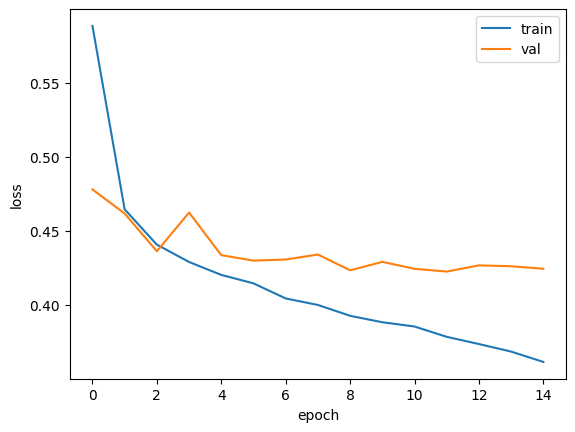

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [7]:
model_dropout=keras.Sequential()
model_dropout.add(keras.layers.Input(shape=(100,)))
model_dropout.add(keras.layers.Embedding(500,16))
model_dropout.add(keras.layers.LSTM(8,dropout=0.2))
model_dropout.add(keras.layers.Dense(1,activation='sigmoid'))

In [8]:
model_dropout.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-dropout-model.keras',save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history=model_dropout.fit(
    train_seq,
    train_target,
    epochs=100,
    batch_size=64,
    validation_data=(val_seq,val_target),
    callbacks=[checkpoint_cb,early_stopping_cb]
)

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.6624 - loss: 0.6066 - val_accuracy: 0.7284 - val_loss: 0.5427
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7817 - loss: 0.4694 - val_accuracy: 0.7952 - val_loss: 0.4458
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7950 - loss: 0.4459 - val_accuracy: 0.7914 - val_loss: 0.4450
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7997 - loss: 0.4315 - val_accuracy: 0.8028 - val_loss: 0.4355
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8041 - loss: 0.4221 - val_accuracy: 0.8068 - val_loss: 0.4262
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8075 - loss: 0.4178 - val_accuracy: 0.7938 - val_loss: 0.4381
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8159 - loss: 0.4063 - val_accuracy: 0.8058 - val_loss: 0.4226
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8123 - loss: 0.4073 - 

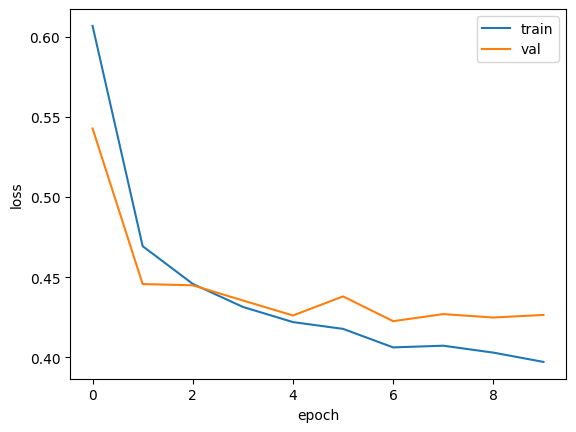

In [9]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [10]:
model_2lstm=keras.Sequential()
model_2lstm.add(keras.layers.Input(shape=(100,)))
model_2lstm.add(keras.layers.Embedding(500,16))
model_2lstm.add(keras.layers.LSTM(8,dropout=0.2,return_sequences=True))
model_2lstm.add(keras.layers.LSTM(8,dropout=0.2))
model_2lstm.add(keras.layers.Dense(1,activation='sigmoid'))
model_2lstm.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 8)         │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 8)              │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,353 (36.54 KB)

 Trainable params: 9,353 (36.54 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model_2lstm.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-2lstm-model.keras',save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history=model_2lstm.fit(
    train_seq,
    train_target,
    epochs=100,
    batch_size=64,
    validation_data=(val_seq,val_target),
    callbacks=[checkpoint_cb,early_stopping_cb]
)

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.6654 - loss: 0.5997 - val_accuracy: 0.7666 - val_loss: 0.4929
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.7724 - loss: 0.4872 - val_accuracy: 0.7522 - val_loss: 0.5033
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.7858 - loss: 0.4594 - val_accuracy: 0.7850 - val_loss: 0.4613
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.7967 - loss: 0.4394 - val_accuracy: 0.8040 - val_loss: 0.4330
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.8065 - loss: 0.4194 - val_accuracy: 0.8054 - val_loss: 0.4259
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.8073 - loss: 0.4197 - val_accuracy: 0.8060 - val_loss: 0.4301
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.8080 - loss: 0.4146 - val_accuracy: 0.8132 - val_loss: 0.4138
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.8148 - loss: 0.400

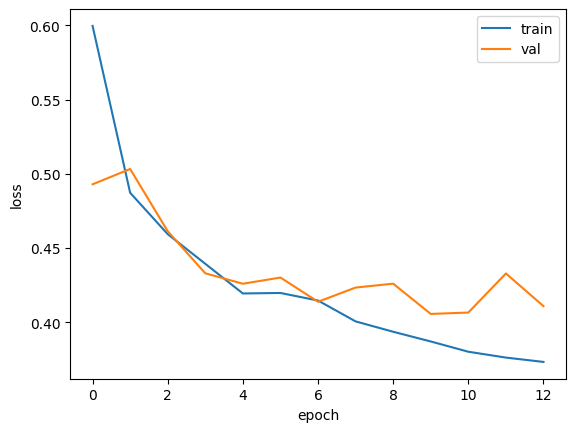

In [12]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [13]:
model_gru=keras.Sequential()
model_gru.add(keras.layers.Input(shape=(100,)))
model_gru.add(keras.layers.Embedding(500,16))
model_gru.add(keras.layers.GRU(8,dropout=0.2))
model_gru.add(keras.layers.Dense(1,activation='sigmoid'))

In [14]:
model_gru.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 8)              │           624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,633 (33.72 KB)

 Trainable params: 8,633 (33.72 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model_gru.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-gru-model.keras',save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history=model_gru.fit(
    train_seq,
    train_target,
    epochs=100,
    batch_size=64,
    validation_data=(val_seq,val_target),
    callbacks=[checkpoint_cb,early_stopping_cb]
)

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.6287 - loss: 0.6359 - val_accuracy: 0.7450 - val_loss: 0.5398
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.7535 - loss: 0.5166 - val_accuracy: 0.7598 - val_loss: 0.4960
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.7799 - loss: 0.4737 - val_accuracy: 0.7780 - val_loss: 0.4721
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.7955 - loss: 0.4516 - val_accuracy: 0.7868 - val_loss: 0.4517
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.8020 - loss: 0.4347 - val_accuracy: 0.7864 - val_loss: 0.4563
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.8066 - loss: 0.4244 - val_accuracy: 0.8026 - val_loss: 0.4274
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.8087 - loss: 0.4168 - val_accuracy: 0.8062 - val_loss: 0.4214
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.8145 - loss: 0.4081 - 

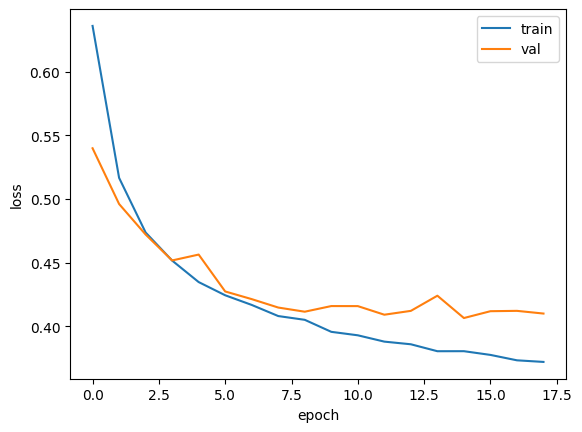

In [16]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [17]:
test_seq=pad_sequences(test_input,maxlen=100)
best_model=keras.models.load_model('best-gru-model.keras')
best_model.evaluate(test_seq,test_target)

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8163 - loss: 0.4056


[0.4055599272251129, 0.81632000207901]